In [1]:
%matplotlib inline

import pickle as pkl
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [17]:
def model_inputs(real_dim, z_dim):
    inputs_real = tf.placeholder(tf.float32, (None, real_dim), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    
    return inputs_real, inputs_z

In [18]:
def generator(z, out_dim, n_units=128, reuse=False, alpha=0.01):
    with tf.variable_scope('generator', reuse=reuse):
        h1 = tf.layers.dense(z, n_units, activation=None)
        h1 = tf.maximum(alpha * h1, h1)
        
        logits = tf.layers.dense(h1, out_dim, activation=None)
        out = tf.tanh(logits)
        
        return out

In [19]:
def discriminator(x, n_units=128, reuse=False, alpha=0.01):
    with tf.variable_scope('discriminator', reuse=reuse):
        h1 = tf.layers.dense(x, n_units, activation=None)
        h1 = tf.maximum(alpha*h1, h1)
        logits = tf.layers.dense(h1, 1, activation=None)
        out = tf.sigmoid(logits)
        
        return out, logits

In [20]:
input_size = 784
z_size = 100
g_hidden_size = 128
d_hidden_size = 128
alpha = 0.01
smooth = 0.1

In [21]:
tf.reset_default_graph()
input_real, input_z = model_inputs(input_size, z_size)

g_model = generator(input_z, input_size, n_units=g_hidden_size, alpha=alpha)

d_model_real, d_logits_real = discriminator(input_real, n_units=d_hidden_size, alpha=alpha)
d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, n_units=d_hidden_size, alpha=alpha)


In [23]:
d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_logits_real)*(1 - smooth)))
d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_logits_real)))

d_loss = d_loss_real + d_loss_fake

g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                               labels=tf.ones_like(d_logits_fake)))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
learning_rate = 0.002

t_vars = tf.trainable_variables()
g_vars = [var for var in t_vars if var.name.startswith('generator')]
d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

d_train_optimize = tf.train.AdamOptimizer(learning_rate).minimize(d_loss, var_list=d_vars)
g_train_optimize = tf.train.AdamOptimizer(learning_rate).minimize(g_loss, var_list=g_vars)

In [25]:
batch_size = 100
batch = mnist.train.next_batch(batch_size)

In [26]:
batch

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([9, 6, 0, 1, 1, 7, 6, 3, 3, 6, 6, 8, 3, 5, 2, 0, 8, 3, 3, 5, 4, 2,
        4, 5, 4, 9, 7, 1, 7, 5, 8, 6, 6, 4, 3, 0, 1, 0, 7, 1, 7, 6, 8, 7,
        2, 2, 3, 8, 1, 3, 6, 1, 6, 9, 9, 1, 4, 8, 5, 4, 4, 1, 9, 8, 1, 8,
        7, 2, 1, 6, 5, 9, 3, 9, 3, 2, 0, 7, 3, 8, 9, 3, 0, 8, 4, 9, 4, 9,
        7, 6, 4, 8, 8, 1, 4, 2, 6, 4, 4, 4], dtype=uint8))

In [27]:
batch[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
len(batch[0])

100

In [30]:
batch[0][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
batch[1][0]

9

In [38]:
epochs = 100
samples = []
losses = []
saver = tf.train.Saver(var_list=g_vars)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(epochs):
        for i in range(mnist.train.num_examples//batch_size):
            batch = mnist.train.next_batch(batch_size)
            
            batch_images = batch[0].reshape((batch_size, 784))
            batch_images = batch_images * 2 - 1
            
            batch_z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            
            _ = sess.run(d_train_optimize, feed_dict={input_real: batch_images, input_z: batch_z})
            _ = sess.run(g_train_optimize, feed_dict={input_z: batch_z})
           
        train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
        train_loss_g = g_loss.eval({input_z: batch_z})
        
        print("エポック {}/{} ".format(e+1, epochs),
        "D ロス: {:.4f}".format(train_loss_d),
        "G ロス: {:.4f}".format(train_loss_g))
        
        losses.append((train_loss_d, train_loss_g))
        
        sample_z = np.random.uniform(-1, 1, size=(16,z_size))
        gen_samples = sess.run(generator(input_z, input_size, n_units=g_hidden_size, reuse=True, alpha=alpha),
                              feed_dict={input_z:sample_z})
        samples.append(gen_samples)
        saver.save(sess, './checkpoints/generator.ckpt')
        
with open('training_samples.pkl', 'wb') as f:
    pkl.dump(samples, f)

エポック 1/100  D ロス: 0.3758 G ロス: 3.4633
エポック 2/100  D ロス: 0.4208 G ロス: 3.3893
エポック 3/100  D ロス: 2.2390 G ロス: 6.3583
エポック 4/100  D ロス: 0.9399 G ロス: 3.7047


エポック 5/100  D ロス: 2.7436 G ロス: 3.0820
エポック 6/100  D ロス: 1.1755 G ロス: 1.0464
エポック 7/100  D ロス: 1.1768 G ロス: 0.9803
エポック 8/100  D ロス: 4.4950 G ロス: 0.2368


エポック 9/100  D ロス: 0.8553 G ロス: 1.3552
エポック 10/100  D ロス: 1.4233 G ロス: 1.6694
エポック 11/100  D ロス: 2.0588 G ロス: 0.9366
エポック 12/100  D ロス: 1.3361 G ロス: 1.1743


エポック 13/100  D ロス: 2.6550 G ロス: 2.6917
エポック 14/100  D ロス: 1.7385 G ロス: 0.6245
エポック 15/100  D ロス: 2.0348 G ロス: 1.9615
エポック 16/100  D ロス: 0.8685 G ロス: 2.0471


エポック 17/100  D ロス: 0.9998 G ロス: 1.5516
エポック 18/100  D ロス: 0.9357 G ロス: 2.7780
エポック 19/100  D ロス: 0.8817 G ロス: 2.6274
エポック 20/100  D ロス: 1.2002 G ロス: 2.6981


エポック 21/100  D ロス: 0.9940 G ロス: 2.1127
エポック 22/100  D ロス: 1.0203 G ロス: 1.5561
エポック 23/100  D ロス: 1.2265 G ロス: 2.0712
エポック 24/100  D ロス: 0.9460 G ロス: 2.2677


エポック 25/100  D ロス: 1.2296 G ロス: 1.6247
エポック 26/100  D ロス: 1.0312 G ロス: 1.9197
エポック 27/100  D ロス: 1.1681 G ロス: 2.4192
エポック 28/100  D ロス: 0.9719 G ロス: 1.5400


エポック 29/100  D ロス: 1.0796 G ロス: 1.6584
エポック 30/100  D ロス: 0.7809 G ロス: 2.3300
エポック 31/100  D ロス: 1.1048 G ロス: 1.7231
エポック 32/100  D ロス: 0.8920 G ロス: 2.3885


エポック 33/100  D ロス: 0.6833 G ロス: 3.0055
エポック 34/100  D ロス: 1.0439 G ロス: 1.7945
エポック 35/100  D ロス: 0.9205 G ロス: 3.1561
エポック 36/100  D ロス: 0.9812 G ロス: 1.3506


エポック 37/100  D ロス: 1.0429 G ロス: 1.8670
エポック 38/100  D ロス: 1.3083 G ロス: 1.5951
エポック 39/100  D ロス: 0.9328 G ロス: 2.4234
エポック 40/100  D ロス: 0.8024 G ロス: 2.5697


エポック 41/100  D ロス: 0.7891 G ロス: 2.8301
エポック 42/100  D ロス: 0.9080 G ロス: 2.2069
エポック 43/100  D ロス: 1.2058 G ロス: 1.8100
エポック 44/100  D ロス: 1.0273 G ロス: 1.7946


エポック 45/100  D ロス: 1.0764 G ロス: 2.2494
エポック 46/100  D ロス: 0.9665 G ロス: 1.7545
エポック 47/100  D ロス: 0.9691 G ロス: 1.9337
エポック 48/100  D ロス: 1.1825 G ロス: 1.4583


エポック 49/100  D ロス: 1.0917 G ロス: 1.7098
エポック 50/100  D ロス: 0.9684 G ロス: 2.3553
エポック 51/100  D ロス: 0.9537 G ロス: 1.8699
エポック 52/100  D ロス: 1.0100 G ロス: 2.0790


エポック 53/100  D ロス: 0.9147 G ロス: 1.8833
エポック 54/100  D ロス: 0.9143 G ロス: 1.7276
エポック 55/100  D ロス: 1.0710 G ロス: 1.7839
エポック 56/100  D ロス: 0.7860 G ロス: 2.2870


エポック 57/100  D ロス: 0.9098 G ロス: 1.9999
エポック 58/100  D ロス: 1.0541 G ロス: 2.1191
エポック 59/100  D ロス: 1.0374 G ロス: 1.7712
エポック 60/100  D ロス: 1.0098 G ロス: 2.1967


エポック 61/100  D ロス: 1.1908 G ロス: 1.6420
エポック 62/100  D ロス: 1.0820 G ロス: 1.6331
エポック 63/100  D ロス: 0.9873 G ロス: 1.6337
エポック 64/100  D ロス: 1.0603 G ロス: 1.8292


エポック 65/100  D ロス: 0.8597 G ロス: 1.9981
エポック 66/100  D ロス: 0.9126 G ロス: 2.0775
エポック 67/100  D ロス: 1.0771 G ロス: 1.5569
エポック 68/100  D ロス: 1.0462 G ロス: 1.8974


エポック 69/100  D ロス: 0.8915 G ロス: 2.1358
エポック 70/100  D ロス: 0.7707 G ロス: 2.0470
エポック 71/100  D ロス: 1.0499 G ロス: 2.1779
エポック 72/100  D ロス: 0.8216 G ロス: 2.1507


エポック 73/100  D ロス: 0.8046 G ロス: 2.0197
エポック 74/100  D ロス: 1.0440 G ロス: 1.4797
エポック 75/100  D ロス: 0.9430 G ロス: 1.8571
エポック 76/100  D ロス: 1.0026 G ロス: 1.3996


エポック 77/100  D ロス: 1.0384 G ロス: 1.8146
エポック 78/100  D ロス: 0.9979 G ロス: 2.5254
エポック 79/100  D ロス: 1.0295 G ロス: 2.1099
エポック 80/100  D ロス: 1.0513 G ロス: 1.8022


エポック 81/100  D ロス: 1.0279 G ロス: 1.9624
エポック 82/100  D ロス: 0.8512 G ロス: 2.0802
エポック 83/100  D ロス: 1.1031 G ロス: 1.4968
エポック 84/100  D ロス: 1.1917 G ロス: 1.5868


エポック 85/100  D ロス: 0.9738 G ロス: 2.2367
エポック 86/100  D ロス: 0.8941 G ロス: 2.1418
エポック 87/100  D ロス: 1.1929 G ロス: 1.7707
エポック 88/100  D ロス: 0.9228 G ロス: 2.5875


エポック 89/100  D ロス: 0.9396 G ロス: 1.6859
エポック 90/100  D ロス: 1.1748 G ロス: 1.6920
エポック 91/100  D ロス: 1.0458 G ロス: 1.8800
エポック 92/100  D ロス: 1.0183 G ロス: 1.5556


エポック 93/100  D ロス: 1.0637 G ロス: 1.6528
エポック 94/100  D ロス: 1.0899 G ロス: 1.7481
エポック 95/100  D ロス: 0.9479 G ロス: 2.0147
エポック 96/100  D ロス: 0.7777 G ロス: 1.8839


エポック 97/100  D ロス: 0.8828 G ロス: 2.1418
エポック 98/100  D ロス: 0.9036 G ロス: 2.1335
エポック 99/100  D ロス: 0.9563 G ロス: 1.8214
エポック 100/100  D ロス: 0.7858 G ロス: 2.4582


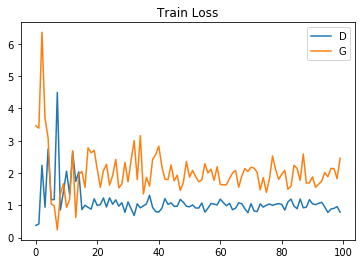

In [39]:
flg, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='D')
plt.plot(losses.T[1], label='G')
plt.title("Train Loss")
plt.legend()

In [40]:
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(7,7), nrows=4, ncols=4, sharey=True, sharex=True)
    for ax,img in zip(axes.flatten(), samples[epoch]):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        
    return fig,axes

In [41]:
with open('training_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

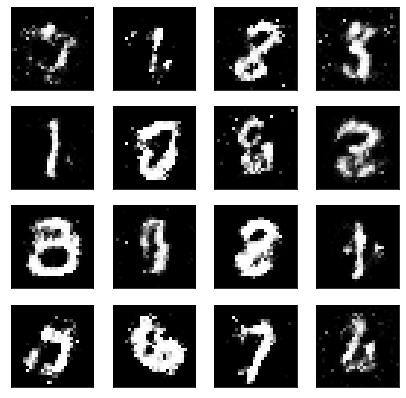

In [42]:
_ = view_samples(-1, samples)

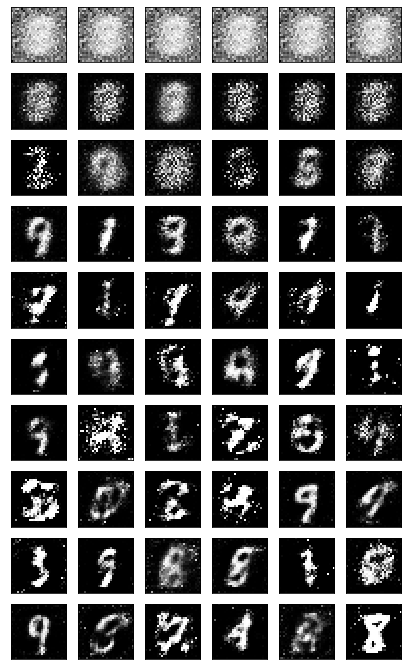

In [44]:
rows, cols = 10, 6
fig, axes = plt.subplots(figsize=(7,12), nrows=rows, ncols=cols,sharex=True, sharey=True)

for sample, ax_row in zip(samples[::int(len(samples)/rows)], axes):
    for img,ax in zip(sample[::int(len(sample)/cols)], ax_row):
        ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

INFO:tensorflow:Restoring parameters from checkpoints\generator.ckpt


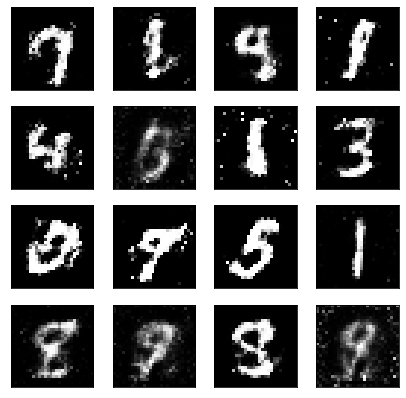

In [47]:
saver = tf.train.Saver(var_list=g_vars)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    sample_z = np.random.uniform(-1,1,size=(16, z_size))
    gen_samples = sess.run(generator(input_z, input_size, n_units=g_hidden_size, reuse=True, alpha=alpha),
                          feed_dict={input_z:sample_z})
_ = view_samples(0, [gen_samples])